<a href="https://colab.research.google.com/github/KediyaVis/Regression/blob/main/Demo_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
categories = ['rec.sport.hockey', 'sci.space', 'comp.graphics', 'talk.politics.mideast']

# Load training and test splits
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers','footers','quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers','footers','quotes'))

X_train, y_train = newsgroups_train.data, newsgroups_train.target
X_test, y_test = newsgroups_test.data, newsgroups_test.target

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
print("Categories:", newsgroups_train.target_names[:4])

Train size: 2341, Test size: 1558
Categories: ['comp.graphics', 'rec.sport.hockey', 'sci.space', 'talk.politics.mideast']


In [43]:
X_train[0]

': 8~> I require BGI drivers for Super VGA Displays and Super XVGA Displays. Does \n: 8~> anyone know where I could obtain the relevant drivers ? (FTP sites ??)\n\n: \tI would like to know too!\n\n: Regards,\n: Dominic\n\ngarbo.uwasa.fi (or one of its many mirrors) has a file\ncalled "svgabg40" in the programming subdirectory.\nThese are svga bgi drivers for a variety of cards.\n\n[from the README]:\n"Card types supported: (SuperVGA drivers)\n  Ahead, ATI, Chips & Tech, Everex, Genoa, Paradise, Oak, Trident (both 8800 \n  and 8900, 9000), Tseng (both 3000 and 4000 chipsets) and Video7.\n  These drivers will also work on video cards with VESA capability.\n  The tweaked drivers will work on any register-compatible VGA card."\n\nenjoy,\nClark Verbrugge\nclump@cs.mcgill.ca\n\n--'

In [44]:
# Pipeline: Vectorization → TF-IDF → Classifier
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# Train the model
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

Accuracy: 0.9159178433889602

Classification Report:
                        precision    recall  f1-score   support

        comp.graphics       0.93      0.92      0.92       389
     rec.sport.hockey       0.89      0.97      0.93       399
            sci.space       0.92      0.84      0.88       394
talk.politics.mideast       0.92      0.94      0.93       376

             accuracy                           0.92      1558
            macro avg       0.92      0.92      0.92      1558
         weighted avg       0.92      0.92      0.92      1558



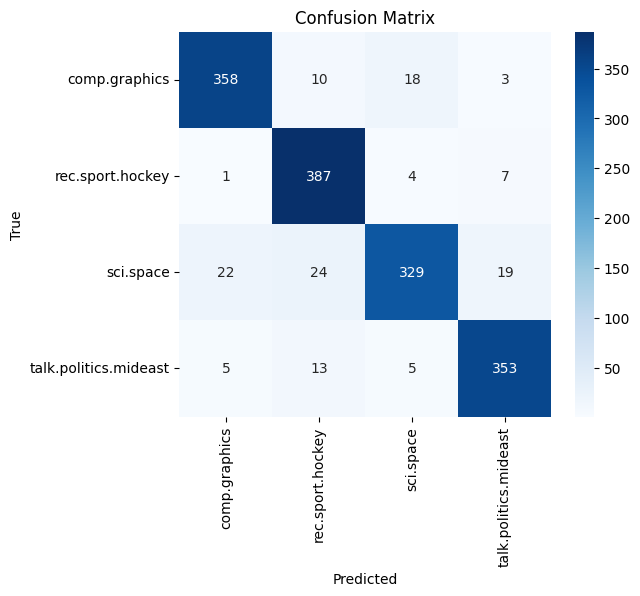

In [45]:
y_pred = text_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups_train.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=newsgroups_train.target_names,
            yticklabels=newsgroups_train.target_names)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

In [47]:
import re
def clean_text(text):
    text = text.lower()                       # lowercase
    text = re.sub(r'[^a-z\s]', '', text)      # keep only letters and spaces
    return text

X_train_clean = [clean_text(doc) for doc in X_train]
X_test_clean = [clean_text(doc) for doc in X_test]

In [49]:
text_clf = Pipeline([
    ('vect', CountVectorizer(
        stop_words='english',   # remove stopwords
        ngram_range=(1,2),      # unigrams + bigrams
        min_df=2                # ignore words that appear in <2 docs
    )),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(X_train_clean, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(min_df=2, ngram_range=(1, 2),
                                 stop_words='english')),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

Accuracy: 0.9094993581514762

Classification Report:
                        precision    recall  f1-score   support

        comp.graphics       0.93      0.90      0.92       389
     rec.sport.hockey       0.88      0.97      0.92       399
            sci.space       0.91      0.83      0.87       394
talk.politics.mideast       0.93      0.93      0.93       376

             accuracy                           0.91      1558
            macro avg       0.91      0.91      0.91      1558
         weighted avg       0.91      0.91      0.91      1558



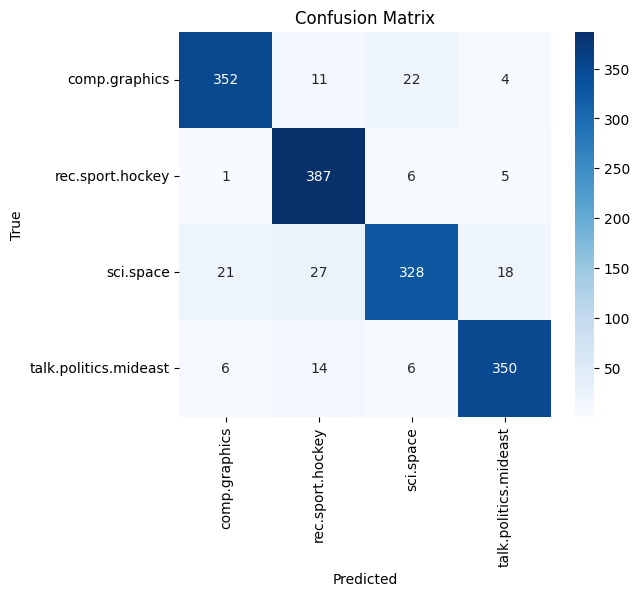

In [50]:
y_pred = text_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups_train.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=newsgroups_train.target_names,
            yticklabels=newsgroups_train.target_names)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()